# **Basic Python**

## 1.a
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [53]:
#TODO
def F(n):
    for i in range(n):
        left_dashes = '-' * (n - i - 1)
        left_letters = ''.join(chr(65 + j) for j in range(i + 1))
        right_letters = ''.join(chr(65 + j) for j in range(i - 1, -1, -1))
        print(left_dashes + left_letters + right_letters + left_dashes)


F(10)
F(6)


---------A---------
--------ABA--------
-------ABCBA-------
------ABCDCBA------
-----ABCDEDCBA-----
----ABCDEFEDCBA----
---ABCDEFGFEDCBA---
--ABCDEFGHGFEDCBA--
-ABCDEFGHIHGFEDCBA-
ABCDEFGHIJIHGFEDCBA
-----A-----
----ABA----
---ABCBA---
--ABCDCBA--
-ABCDEDCBA-
ABCDEFEDCBA


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [54]:
#TODO
def F(d: dict):
    print("Sorted by key values:")
    for key in sorted(d.keys()):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")

    print("\nSorted by x values:")
    for key in sorted(d, key=lambda k: d[k][0], reverse=True):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")

    print("\nSorted by y values :")
    for key in sorted(d, key=lambda k: d[key][1]):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})


Sorted by key values:
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-

Sorted by x values:
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-

Sorted by y values :
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-
-4-, -2-, -3-
Sorted by key values:
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-

Sorted by x values:
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-

Sorted by y values :
--8-, -4-, -2-
-6-, --3-, -4-
-7-, -2-, -1-
-5-, -9-, --10-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [55]:
import pandas as pd

df = pd.read_csv('student_records.csv')
print(df.head(10))

   roll_number department  credit course_name      course_type grade
0       588946         MA       3       EC250  hasmed_elective    AB
1       145372         EP       4       EP407  hasmed_elective    CC
2       834515         MA       8       EP885  hasmed_elective    BB
3       344265        CSE       6      CSE699          honours    AB
4       358405         MA       3       EE460            minor    AP
5       781075         CE       8       CE540          honours    CC
6       180828        CSE       6       CE880            minor    AB
7       981238         MM       4      CSE226            minor    AB
8       836881         MM       8       MM530             core    AA
9       310604         EE       8       EE202             core    AB


#### 2.b: Print out the total credits and calculte CPI of each student.
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [56]:
import pandas as pd

df = pd.read_csv('student_records.csv')

df['grade_points'] = df['grade'].map({
   'AP': 10, 'AA': 10,
   'AB': 9,
   'BB': 8,
   'BC': 7,
   'CC': 6
})


df['weighted_points'] = df['credit'] * df['grade_points']


student_summary = df.groupby('roll_number').agg({
   'credit': 'sum',
   'weighted_points': 'sum'
})


student_summary['CPI'] = student_summary['weighted_points'] / student_summary['credit']

student_summary['CPI'] = student_summary['CPI']

print(student_summary)


             credit  weighted_points       CPI
roll_number                                   
124663          229             1861  8.126638
138296          200             1655  8.275000
143142          234             2055  8.782051
143856          201             1706  8.487562
144528          228             1860  8.157895
...             ...              ...       ...
981238          168             1385  8.244048
986057          199             1605  8.065327
993835          175             1476  8.434286
995208          157             1222  7.783439
998293          207             1800  8.695652

[100 rows x 3 columns]


#### 2.c: Print out the names of all students who meet the graduation requirements
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [57]:
import pandas as pd

df = pd.read_csv('student_records.csv')

def check_graduation_requirements(student_courses):

   credits = {
       'core': 0,
       'department_elective': 0,
       'flexible_elective': 0,
       'hasmed_elective': 0
   }

   # Adds credits for each course type
   for _, course in student_courses.iterrows():
       if course['course_type'] == 'core':
           credits['core'] += course['credit']
       elif course['course_type'] == 'minor':
           credits['department_elective'] += course['credit']
       elif course['course_type'] == 'honours':
           credits['flexible_elective'] += course['credit']
       elif course['course_type'] == 'hasmed_elective':
           credits['hasmed_elective'] += course['credit']

   # Checks if all graduation requirements are met
   return (
       credits['core'] >= 20 and
       credits['department_elective'] >= 15 and
       credits['flexible_elective'] >= 10 and
       credits['hasmed_elective'] >= 5
   )

student_courses = df.groupby('roll_number')

graduates = [
   roll_number for roll_number, courses in student_courses
   if check_graduation_requirements(courses)
]

print("Students meeting graduation requirements:")
print(graduates)

Students meeting graduation requirements:
[124663, 143142, 143856, 144528, 145372, 150503, 159438, 199713, 203200, 208100, 214270, 265922, 283796, 362471, 364146, 379479, 388969, 391848, 461971, 465496, 482623, 500658, 517837, 521087, 534763, 571782, 572815, 581065, 581858, 582912, 588946, 608522, 608952, 613401, 626000, 628849, 630568, 681499, 692318, 703403, 716985, 718510, 721490, 773982, 781075, 782129, 787967, 788020, 810863, 834515, 836881, 845623, 879634, 881983, 888886, 955757, 960395, 970791, 971123, 973158]


#### 2.d: Print out the names of all students who completed a minor
Atleast 10 credits with minor tag in a specific department

In [58]:
import pandas as pd

# Reads the CSV file
df = pd.read_csv('student_records.csv')

# Filters out only the courses that are marked as "minor"
minor_courses = df[df['course_type'] == 'minor']

minor_summary = minor_courses.groupby('roll_number')['credit'].sum()

students_with_minor = minor_summary[minor_summary >= 10]

print("Students who completed a minor (at least 10 credits):")
print(students_with_minor.index)


Students who completed a minor (at least 10 credits):
Index([124663, 138296, 143142, 143856, 144528, 145372, 150503, 159438, 180828,
       194063, 199713, 203200, 207443, 208100, 214270, 265922, 270007, 282482,
       283796, 294697, 301135, 327122, 329535, 344265, 358405, 362471, 364146,
       379479, 381227, 381526, 388969, 391848, 458200, 461584, 461971, 465496,
       478606, 482623, 485484, 488661, 500658, 517837, 521087, 534763, 571782,
       572815, 581065, 581858, 582912, 588946, 597353, 608522, 608952, 613401,
       626000, 628849, 630568, 680096, 681499, 692318, 703403, 716985, 718510,
       721490, 733782, 750259, 773982, 775967, 781075, 782129, 787967, 788020,
       810863, 816041, 834515, 836431, 836881, 841365, 845623, 847809, 851029,
       871746, 879634, 881983, 888886, 907454, 955757, 960395, 970791, 971123,
       973158, 981238, 986057, 993835, 995208, 998293],
      dtype='int64', name='roll_number')


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [59]:
import pandas as pd


df = pd.read_csv('student_records.csv')

honours_courses = df[df['course_type'] == 'honours']
core_courses = df[df['course_type'] == 'core']

honours_summary = honours_courses.groupby('roll_number')['credit'].sum()
core_summary = core_courses.groupby('roll_number')['credit'].sum()

honours_students = honours_summary[honours_summary >= 10]
core_students = core_summary[core_summary >= 20]
eligible_students = honours_students[honours_students.index.isin(core_students.index)]

print("Students who completed honours :")
print(eligible_students.index)


Students who completed honours :
Index([124663, 143142, 143856, 144528, 145372, 150503, 159438, 199713, 203200,
       207443, 208100, 214270, 265922, 282482, 283796, 294697, 310604, 327122,
       362471, 364146, 379479, 388969, 391848, 458200, 461971, 465496, 482623,
       485484, 488661, 500658, 517837, 521087, 534763, 571782, 572815, 581065,
       581858, 582912, 588946, 589528, 608522, 608952, 613401, 626000, 628849,
       630568, 681499, 692318, 703403, 716985, 718510, 721490, 750259, 773982,
       781075, 782129, 787967, 788020, 810863, 834515, 836881, 845623, 870642,
       871746, 879634, 881983, 888886, 928288, 955757, 960395, 970791, 971123,
       973158, 986057, 998293],
      dtype='int64', name='roll_number')


# **SciPy**

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [60]:
import numpy as np
from scipy.optimize import minimize

# Function we need to minimize
def f(variables):
    x, y = variables
    return 2*(x - y - 3)**2 + 4*(x + 2*y + 1)**4

# The functions for the constraints
def constraint1(variables):
    x, y = variables
    return x - y + 3

def constraint2(variables):
    x, y = variables
    return 5 - (x + 2)**2 - (y + 1)**2


initial_guess = np.array([0, 0])
result = minimize(f, initial_guess, method='SLSQP', constraints=[
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2}
])


print(f"Optimal solution: x={result.x[0]}, y={result.x[1]}")
print(f"Minimum function value: {result.fun}")

Optimal solution: x=0.2349250274647683, y=-0.9285148850646019
Minimum function value: 7.345026216977383


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [61]:
import numpy as np
from scipy.integrate import quad

# Parameterization done in copy
def integrand(t):
    sqrt_3 = np.sqrt(3)
    f_t = (sqrt_3 * np.cos(t))**2 + (sqrt_3 * np.sin(t))**4
    return f_t * sqrt_3

result, error = quad(integrand, 0, 2 * np.pi)

print(f"Line integral : {result:}")




Line integral : 53.05363140385085


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [62]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def load_data(data_path):
    """
    Load the 2D coordinates from the given file.
    Data is stored in a text file with lines formatted as "x,y".
    Arguments:
        data_path (str): Path to the file containing spice locations.
    Returns an array of shape (N, 2), where N is the number of data points.
    """
    return np.loadtxt(data_path, delimiter=',')

In [64]:
def initialise_centers(data, K, init_centers=None):
    """
    Initialize centers for clustering.
    Arguments:
        data (np.ndarray): Data points of shape (N, 2).
        K (int): Number of clusters.
        init_centers (np.ndarray or None): Predefined centers, or None to select randomly.
    Returns an initial cluster centers of shape (K, 2).
    """
    if init_centers is None:
        return data[np.random.choice(data.shape[0], K, replace=False)]
    return init_centers

In [65]:
def initialise_labels(data):
    """
    Initialize labels to all ones.
    Arguments:
        data (np.ndarray): Data points of shape (N, 2).
    Returns an Array of shape (N,), initialized with ones.
    """
    return np.ones(data.shape[0], dtype=int)

In [66]:
# TODO 3.1: Calculate distances
def calculate_distances(data, centers):
    """
    Calculate distances from each data point to each center.
    Argsments:
        data (np.ndarray): Data points of shape (N, 2).
        centers (np.ndarray): Current centers of shape (K, 2).
    Returns a distance matrix of shape (N, K).
    """
    return np.linalg.norm(data[:, np.newaxis] - centers, axis=2)

In [67]:
def update_labels(distances):
    """
    Assign the label of the nearest center to each data point.
    Arguments:
        distances (np.ndarray): Distance matrix of shape (N, K).
    Returns an Array of size (N), containing cluster labels.
    """
    return np.argmin(distances, axis=1)

In [68]:
def update_centers(data, labels, K):
    """
    Update the cluster centers based on the mean of the assigned points.
    Arguments:
        data (np.ndarray): Data points of shape (N, 2).
        labels (np.ndarray): Current cluster labels of shape (N,).
        K (int): Number of clusters.
    Returns the updated centers of shape (K, 2).
    """
    return np.array([data[labels == k].mean(axis=0) for k in range(K)])

In [69]:
def check_termination(labels1, labels2):
    """
    Check if the labels have changed between iterations.
    Argumentss:
        labels1 (np.ndarray): Labels from the previous iteration.
        labels2 (np.ndarray): Labels from the current iteration.
    Returns True if labels haven't changed, False otherwise.
    """
    return np.array_equal(labels1, labels2)

In [70]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new

    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time

In [71]:
def visualise(data_path, labels, centers):
    """
    Create a scatter plot of the clustered data.
    Arguments:
        data_path: Path to the data file.
        labels (np.ndarray): Cluster labels of shape (N,).
        centers (np.ndarray): Cluster centers of shape (K, 2).
    Returns a plot.
    """
    data = load_data(data_path)

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')


    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, edgecolors='black')
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Save the plot
    plt.savefig('kmeans.png')

    return plt

Time taken for the algorithm to converge: 0.00045561790466308594


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

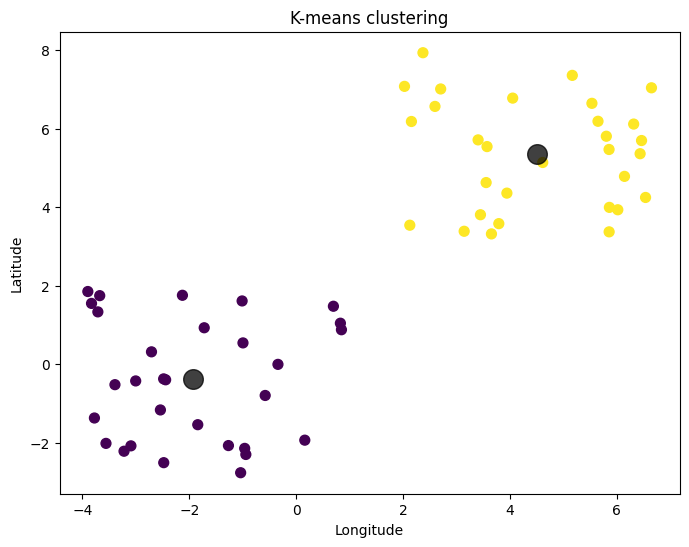

In [72]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)